In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import cv2
import glob
from keras import models
import os
import seaborn as sns
from keras.utils import to_categorical
from PIL import Image

from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator


%matplotlib inline


Using TensorFlow backend.


En primer lugar se hace una rutina para que se lean las imagenes dentro de una variable **training_data** que contenga las imágenes con su respectiva etiqueta

In [113]:
img_size = 100
datadir = "imagenes/"
categories = ["Perro100","Gato100"]
training_data=[]
labels = []
for category in categories:
    path =os.path.join(datadir,category)
    class_num = categories.index(category)
    for i in os.listdir(path)[1:-1]:
        if type(None) != type(cv2.imread(os.path.join(path,i),cv2.IMREAD_GRAYSCALE)):
            print(os.path.join(path,i)) 
            img_array = cv2.imread(os.path.join(path,i),cv2.IMREAD_GRAYSCALE)
            new_array =cv2.resize(img_array,(img_size,img_size))
            training_data.append(new_array)
            labels.append(class_num)
        else:
            print("imagen"+i+" no valida")

imagenes/Perro100/0.jpg
imagenes/Perro100/1.jpg
imagenes/Perro100/10.jpg
imagenes/Perro100/100.jpg
imagenes/Perro100/1000.jpg
imagenes/Perro100/10000.jpg
imagenes/Perro100/10001.jpg
imagenes/Perro100/10002.jpg
imagenes/Perro100/10003.jpg
imagenes/Perro100/10004.jpg
imagenes/Perro100/10005.jpg
imagenes/Perro100/10006.jpg
imagenes/Perro100/10007.jpg
imagenes/Perro100/10008.jpg
imagenes/Perro100/10009.jpg
imagenes/Perro100/1001.jpg
imagenes/Perro100/10010.jpg
imagenes/Perro100/10011.jpg
imagenes/Perro100/10012.jpg
imagenes/Perro100/10013.jpg
imagenes/Perro100/10014.jpg
imagenes/Perro100/10015.jpg
imagenes/Perro100/10016.jpg
imagenes/Perro100/10017.jpg
imagenes/Perro100/10018.jpg
imagenes/Perro100/10019.jpg
imagenes/Perro100/1002.jpg
imagenes/Perro100/10020.jpg
imagenes/Perro100/10021.jpg
imagenes/Perro100/10022.jpg
imagenes/Perro100/10023.jpg
imagenes/Perro100/10024.jpg
imagenes/Perro100/10025.jpg
imagenes/Perro100/10026.jpg
imagenes/Perro100/10027.jpg
imagenes/Perro100/10028.jpg
imagenes

In [114]:
np.shape(training_data)

(24925, 100, 100)

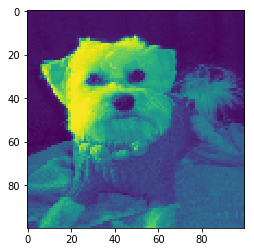

In [115]:
x = np.arange(len(training_data))
ind = (x[np.random.choice(x,size=int(0.8*len(training_data)),replace=False)])
ind_rev = np.delete(x,ind)

X_train=[];Y_train =[]
X_test = []; Y_test = []
for i in ind:
    X_train.append(training_data[i])
    Y_train.append(labels[i])
for i in ind_rev:
    X_test.append(training_data[i])
    Y_test.append(labels[i])
    
ima= np.random.randint(len(X_test))
plt.imshow(training_data[ima])

Se define entonces los datos de entrenamiento y los datos test

In [7]:
#[X_train,Y_train] = training_data[:int(0.8*len(training_data))],labels[:int(0.8*len(labels))]
#[X_test,Y_test] = training_data[int(0.8*len(training_data)):len(training_data)],labels[int(0.8*len(labels)):len(labels)]

hay 19940 datos de entrenamiento y 4985 datos de testeo
Este es el numero de ocurrencia de cada animal


(19940, 100, 100, 1)

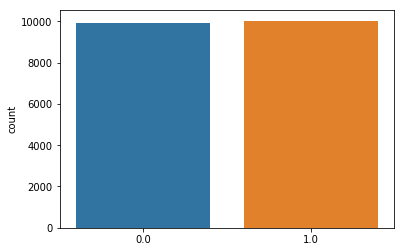

In [116]:
X_train = np.array(X_train).reshape(len(X_train),img_size,img_size,1)/np.max(X_train)
Y_train = np.array(Y_train)/np.max(Y_train)
X_test = np.array(X_test).reshape(len(X_test),img_size,img_size,1)/np.max(X_test)
Y_test = np.array(Y_test)/np.max(Y_test)

print("hay", X_train.shape[0],"datos de entrenamiento y",X_test.shape[0],"datos de testeo")
print("Este es el numero de ocurrencia de cada animal")
sns.countplot(Y_train)

np.shape(X_train)



Veamos las primeras 64 imagenes que vamos a utilizar

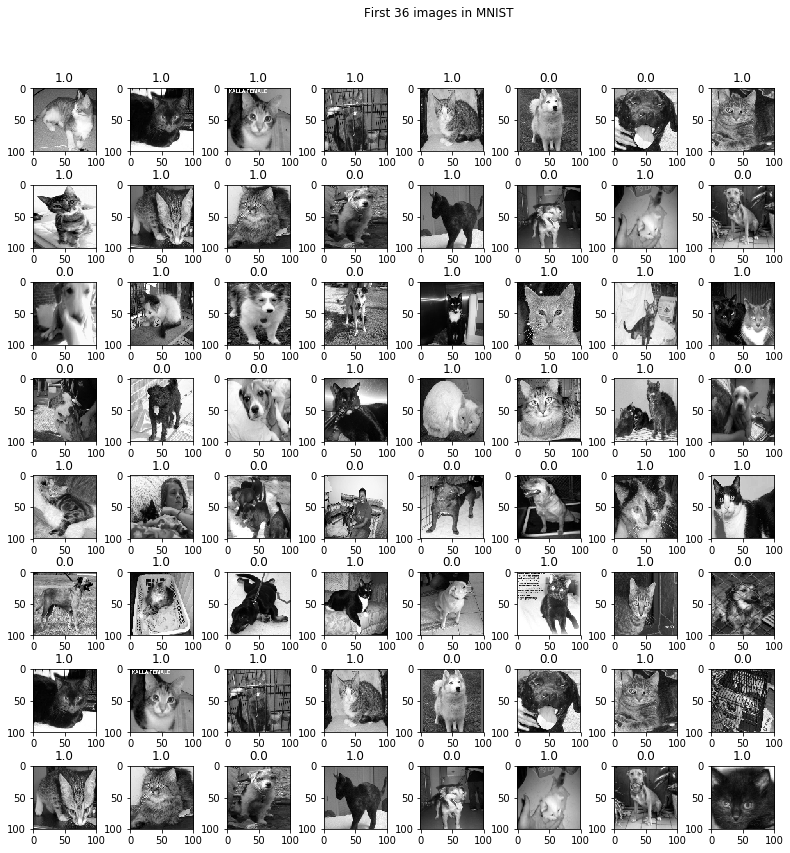

In [69]:
fig, ax = plt.subplots(8, 8, figsize = (12, 12))
fig.suptitle('First 36 images in MNIST')
fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
for x, y in [(i, j) for i in range(8) for j in range(8)]:
    ax[x, y].imshow(X_train[x + y * 6].reshape((img_size, img_size)), cmap = 'gray')
    ax[x, y].set_title(Y_train[x + y * 6])

In [117]:
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [118]:
print(Y_train)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [0. 1.]
 [1. 0.]]


In [124]:
np.shape(Y_train)

(19940, 2)

In [125]:
size = (img_size,img_size,1)
n_classes = 2

model = Sequential()

model.add(Conv2D(32,(3,3),input_shape = size,kernel_initializer = "normal"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64,(3,3),input_shape = size,kernel_initializer = "normal"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(128, (3, 3), kernel_initializer = 'normal'))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(n_classes))
model.add(Activation('softmax'))

model.compile(loss = 'categorical_crossentropy', 
              optimizer = 'rmsprop', 
              metrics = ['accuracy'])

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_82 (Conv2D)           (None, 96, 96, 16)        416       
_________________________________________________________________
activation_91 (Activation)   (None, 96, 96, 16)        0         
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 44, 44, 64)        25664     
_________________________________________________________________
activation_92 (Activation)   (None, 44, 44, 64)        0         
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 22, 22, 64)        0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 22, 22, 64)        0         
__________

In [126]:
model.fit(X_train, Y_train, batch_size = 256, epochs = 4, 
        validation_split = 0.2, verbose = 1)

Train on 15952 samples, validate on 3988 samples
Epoch 1/4
15952/15952 [==============================] - 652s 41ms/step - loss: 0.7947 - acc: 0.5498 - val_loss: 0.7106 - val_acc: 0.5241
Epoch 2/4
15952/15952 [==============================] - 423s 27ms/step - loss: 0.6448 - acc: 0.6367 - val_loss: 0.6544 - val_acc: 0.6374
Epoch 3/4
15952/15952 [==============================] - 423s 27ms/step - loss: 0.6001 - acc: 0.6821 - val_loss: 0.6290 - val_acc: 0.6424
Epoch 4/4
15952/15952 [==============================] - 414s 26ms/step - loss: 0.5487 - acc: 0.7206 - val_loss: 0.5521 - val_acc: 0.7287


In [127]:
score, acc = model.evaluate(X_test, Y_test, verbose = 1)
print(score)
print(acc)

4985/4985 [==============================] - 76s 15ms/step
0.5830019887824475
0.7129388165330457


In [128]:
Y_pred = model.predict(X_test)
Y_pred

array([[0.60489696, 0.39510307],
       [0.1933569 , 0.80664307],
       [0.8509356 , 0.14906448],
       ...,
       [0.25279567, 0.7472043 ],
       [0.21112801, 0.78887194],
       [0.09650239, 0.90349764]], dtype=float32)

Es perro
[0.624146 0.375854]


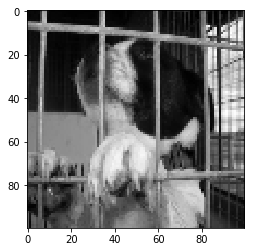

In [160]:
ima= np.random.randint(len(X_test))
plt.imshow(X_test[ima].reshape(img_size,img_size),cmap = "gray")
if np.argmax(Y_pred[ima]) == 1:
    print("Es gato")
else:
    print("Es perro")
print (Y_pred[ima])

In [138]:
Y_pred = model.predict(X_test)
Y_pred_real = []
Y_test_real = []
Y_prob = []
for i in range(len(Y_pred)):
    Y_pred_real.append(np.argmax(Y_pred[i], axis=None, out=None))
    Y_test_real.append(np.argmax(Y_test[i], axis=None, out=None))
    Y_prob.append(np.max(Y_pred[i]))
print(Y_pred_real)
print(Y_test_real)

[0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 